In [1]:
#!pip3 install scanpy

# Challenge 1

In [1]:
import re
import pandas as pd
import scanpy as sc
import os
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Read observation data

In [2]:
os.getcwd()
os.chdir('data')

### Get observation data

In [3]:
print('reading observation data...')
df_obs = sc.read_h5ad('./sc_training.h5ad')
df_obs = df_obs.obs
df_obs

reading observation data...


,gRNA_maxID,state,condition,lane
053l1_AAACCTGAGATGTCGG-1,ONE-NON-GENE-SITE-7,terminal exhausted,Unperturbed,lane1
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1
053l1_AAACCTGAGTCGTTTG-1,Tox2-3,terminal exhausted,Tox2,lane1
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1
...,...,...,...,...
053l4_TTTGTCATCAGGTTCA-1,Tox2-3,other,Tox2,lane4
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4
053l4_TTTGTCATCCTCGCAT-1,Zeb2-2,cycling,Zeb2,lane4
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4


# Get Tencent scBERT data

In [8]:
scbert = sc.read_h5ad('./panglao_human.h5ad')
scbert.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Batch
09cbFwH3,2371,2371,689381.0,43521.0,6.313055,SRA275902
0AdkBIuA,2568,2568,601183.0,41842.0,6.959944,SRA275902
0frx9XJU,1570,1570,341170.0,33386.0,9.785737,SRA275902
0NaEBg2H,3141,3141,438603.0,48809.0,11.128287,SRA275902
0NQlCyEz,3289,3289,1020715.0,36329.0,3.559172,SRA275902
...,...,...,...,...,...,...
TTTTGTAATATA,794,794,1433.0,96.0,6.699232,SRA878024_SRS4660848
TTTTTCGCGCGG,609,609,988.0,71.0,7.186235,SRA878024_SRS4660848
TTTTTGGAGCCC,983,983,1930.0,102.0,5.284974,SRA878024_SRS4660848
TTTTTTAGCCCC,323,323,426.0,15.0,3.521127,SRA878024_SRS4660848


In [15]:
total_genes = scbert.obs

### Unperturbed data

In [5]:
# unperturbed_data = df_obs[df_obs['condition'] == 'Unperturbed']
# unperturbed_data = unperturbed_data[['gRNA_maxID','state']]
# unperturbed_data = unperturbed_data.groupby(by=['gRNA_maxID'],as_index=False).value_counts(normalize=True)
#
# unperturbed_data

### Get cells data

In [6]:
print('reading cells adata.X.toarray()...')
adata_df = sc.read_h5ad('./sc_training.h5ad')
adata = pd.DataFrame(adata_df.X.toarray())
adata.columns = adata_df.var_names
adata.index = adata_df.obs_names
adata

reading cells adata.X.toarray()...


,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Gm26901,Rrs1,Adhfe1,...,Slc3a1,Cfap53,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot
053l1_AAACCTGAGATGTCGG-1,0.511520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGCAACGGT-1,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,0.000000,0.0,0.484165,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTACGACG-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693748,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTCGTTTG-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTGAAGAG-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCATCAGGTTCA-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCAGTGTTG-1,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCCTCGCAT-1,0.000000,0.000000,0.000000,0.515672,0.515672,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCTTCAACT-1,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,0.000000,0.0,0.383328,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Get clone information file

In [7]:
clone_info = pd.read_csv('clone_information.csv')
clone_info.index = clone_info['Unnamed: 0']
clone_info = clone_info.drop(['Unnamed: 0','gRNA_maxID'],axis=1)
clone_info = clone_info.rename_axis('index')
clone_info

,gRNA_bam,umi
index,,
053l1_AAACCTGAGATGTCGG-1,CAACGGATCAATAGAGCCAT,TAGTCC
053l1_AAACCTGAGCAACGGT-1,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGAGTACGACG-1,TCCGGACCTTCAGCGGAAGC,ATGACG
053l1_AAACCTGAGTGAAGAG-1,CCGATCTCTCTGGATTTTAT,ACAGTG
053l1_AAACCTGAGTGTTAGA-1,CGTAGGCGATATAATTCTAG,GGAATG
...,...,...
053l4_TTTGTCAGTGCCTGCA-1,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCAGTTTCCACC-1,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCATCAGTGTTG-1,CCACGCATGGAGAGGGTGAG,AAGAGG


### Merge all the data

In [8]:
print('merging observation data with cells data on the same index...')
df_partial_data = df_obs.merge(adata,left_index=True,right_index=True)
df_full_data = df_partial_data.merge(clone_info,left_index=True,right_index=True)

df_full_data

merging observation data with cells data on the same index...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGATGTCGG-1,ONE-NON-GENE-SITE-7,terminal exhausted,Unperturbed,lane1,0.511520,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAACGGATCAATAGAGCCAT,TAGTCC
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCCGGACCTTCAGCGGAAGC,ATGACG
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGATCTCTCTGGATTTTAT,ACAGTG
053l1_AAACCTGAGTGTTAGA-1,ONE-NON-GENE-SITE-6,effector,Unperturbed,lane1,0.000000,1.089103,0.686024,0.686024,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CGTAGGCGATATAATTCTAG,GGAATG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.957485,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCAGTTTCCACC-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.000000,0.000000,0.534219,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCACGCATGGAGAGGGTGAG,AAGAGG
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGGGACCAGCTTAGCGTGG,CTGAGA


### Perturbed data

In [9]:
print('dropping unperturbed data...')
perturbed_data = df_full_data[df_full_data['condition'] != 'Unperturbed']
perturbed_data['condition'] = perturbed_data['condition'].cat.remove_categories('Unperturbed')

perturbed_data

dropping unperturbed data...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCCGGACCTTCAGCGGAAGC,ATGACG
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGATCTCTCTGGATTTTAT,ACAGTG
053l1_AAACCTGCAGCAGTTT-1,Tox2-3,cycling,Tox2,lane1,0.000000,0.192784,0.493393,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGCATTACCTT-1,Ikzf3-3,cycling,Ikzf3,lane1,0.412417,0.703557,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CACACGTCGCAGTTCATCTT,CAATCG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.957485,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCAGTTTCCACC-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.000000,0.000000,0.534219,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCACGCATGGAGAGGGTGAG,AAGAGG
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGGGACCAGCTTAGCGTGG,CTGAGA


In [10]:
# print('grouping the data by gRNA_maxID and getting the proportions...')
# perturbed_data_prop = perturbed_data.iloc[:,0:4].groupby(by=['gRNA_maxID'],as_index=False).value_counts(normalize=True)
# perturbed_data_prop

In [11]:
# print('dropping perturbations with < 2...')
# perturbed_data_prop_filtered = perturbed_data_prop[perturbed_data_prop['proportion'] > 2]
# perturbed_data_prop_filtered = perturbed_data_prop_filtered.drop('proportion',axis=1).reset_index(drop=True)
# perturbed_data_prop_filtered

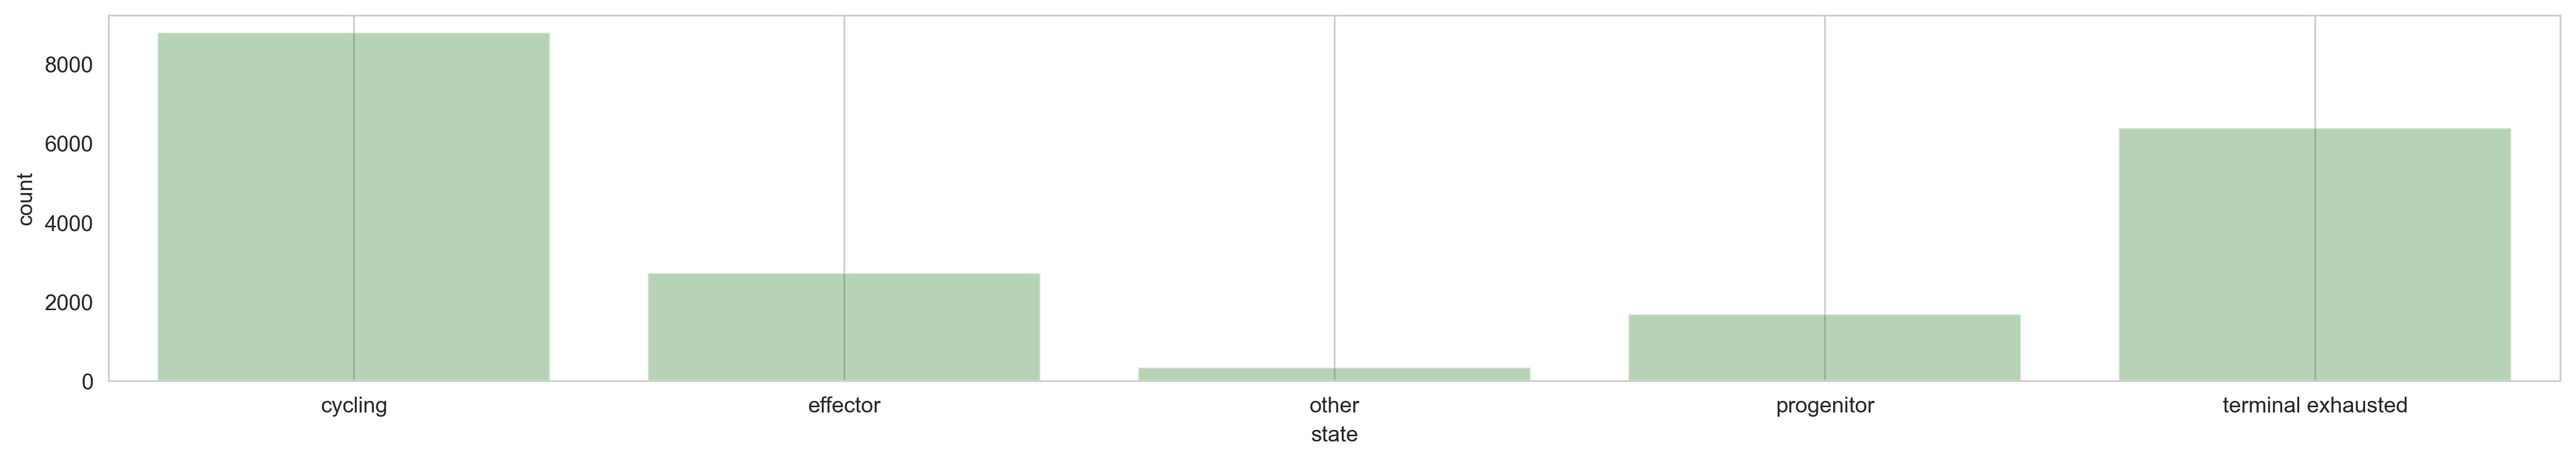

In [12]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.countplot(x=perturbed_data['state'],color='green',alpha=0.3)
plt.grid()

# Check null values

In [13]:
def check_nans(df):
    nans_data = df.isna().sum().reset_index()
    nans_data = nans_data[nans_data[0] > 0]
    return nans_data

In [14]:
check_nans(perturbed_data)

,index,0
15082,umi,123


In [15]:
perturbed_data['umi'] = perturbed_data['umi'].fillna('mode')
perturbed_data_final = perturbed_data

In [16]:
perturbed_data_final['umi']

053l1_AAACCTGAGCAACGGT-1    ACTTCG
053l1_AAACCTGAGTACGACG-1    ATGACG
053l1_AAACCTGAGTGAAGAG-1    ACAGTG
053l1_AAACCTGCAGCAGTTT-1    ACTTCG
053l1_AAACCTGCATTACCTT-1    CAATCG
                             ...  
053l4_TTTGTCAGTGCCTGCA-1    ACTTCG
053l4_TTTGTCAGTTTCCACC-1    ACTTCG
053l4_TTTGTCATCAGTGTTG-1    AAGAGG
053l4_TTTGTCATCTTCAACT-1    CTGAGA
053l4_TTTGTCATCTTTCCTC-1    AAGAGG
Name: umi, Length: 19855, dtype: object

# Split the data into Train & validate

In [17]:
print('splitting the data into train, validate, & test sets...')
train_data = perturbed_data_final.drop(['Aqr','Bach2','Bhlhe40','Ets1','Fosb','Mafk','Stat3'],axis=1)
validate_data = perturbed_data_final.iloc[:,0:4]
validate_data['gRNA_bam'] = perturbed_data_final['gRNA_bam']
validate_data['umi'] = perturbed_data_final['umi']
validate_data = pd.concat([validate_data,perturbed_data_final[['Aqr','Bach2','Bhlhe40']]],axis=1)

splitting the data into train, validate, & test sets...


In [18]:
validate_data

,gRNA_maxID,state,condition,lane,gRNA_bam,umi,Aqr,Bach2,Bhlhe40
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,GAGTCATATGCCGCCACCTC,ACTTCG,0.000000,0.0,0.000000
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,TCCGGACCTTCAGCGGAAGC,ATGACG,0.000000,0.0,2.080492
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,CCGATCTCTCTGGATTTTAT,ACAGTG,0.617566,0.0,0.996512
053l1_AAACCTGCAGCAGTTT-1,Tox2-3,cycling,Tox2,lane1,GAGTCATATGCCGCCACCTC,ACTTCG,0.192784,0.0,1.069386
053l1_AAACCTGCATTACCTT-1,Ikzf3-3,cycling,Ikzf3,lane1,CACACGTCGCAGTTCATCTT,CAATCG,0.000000,0.0,1.267602
...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,Tox2-3,terminal exhausted,Tox2,lane4,GAGTCATATGCCGCCACCTC,ACTTCG,0.000000,0.0,1.889790
053l4_TTTGTCAGTTTCCACC-1,Tox2-3,terminal exhausted,Tox2,lane4,GAGTCATATGCCGCCACCTC,ACTTCG,0.000000,0.0,0.880552
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,CCACGCATGGAGAGGGTGAG,AAGAGG,0.000000,0.0,1.011989
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,CCGGGACCAGCTTAGCGTGG,CTGAGA,0.000000,0.0,1.735469


### Encoding categorical columns

In [19]:
from sklearn.preprocessing import LabelEncoder

def encode_data(df_train,df_validate):

    encoder_A = LabelEncoder()
    encoder_B = LabelEncoder()
    encoder_C = LabelEncoder()
    encoder_D = LabelEncoder()
    encoder_E = LabelEncoder()
    encoder_F = LabelEncoder()

    print('encoding train categorical variables...')
    df_train['gRNA_maxID'] = encoder_A.fit_transform(df_train['gRNA_maxID'])
    df_train['state'] = encoder_B.fit_transform(df_train['state'])
    df_train['condition'] = encoder_C.fit_transform(df_train['condition'])
    df_train['lane'] = encoder_D.fit_transform(df_train['lane'])
    df_train['gRNA_bam'] = encoder_E.fit_transform(df_train['gRNA_bam'])
    df_train['umi'] = encoder_F.fit_transform(df_train['umi'])

    print('encoding validate categorical variables...')
    df_validate['gRNA_maxID'] = encoder_A.transform(df_validate['gRNA_maxID'])
    df_validate['state'] = encoder_B.transform(df_validate['state'])
    df_validate['condition'] = encoder_C.transform(df_validate['condition'])
    df_validate['lane'] = encoder_D.transform(df_validate['lane'])
    df_validate['gRNA_bam'] = encoder_E.fit_transform(df_validate['gRNA_bam'])
    df_validate['umi'] = encoder_F.fit_transform(df_validate['umi'])

    return df_train,df_validate

train_data_labeled,validate_data_labeled = encode_data(train_data,validate_data)
train_data_labeled

encoding train categorical variables...
encoding validate categorical variables...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.192784,0.493393,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.412417,0.703557,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.957485,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,0.534219,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


In [20]:
validate_data_labeled

,gRNA_maxID,state,condition,lane,gRNA_bam,umi,Aqr,Bach2,Bhlhe40
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,138,62,0.000000,0.0,0.000000
053l1_AAACCTGAGTACGACG-1,171,1,62,0,151,113,0.000000,0.0,2.080492
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,58,32,0.617566,0.0,0.996512
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,138,62,0.192784,0.0,1.069386
053l1_AAACCTGCATTACCTT-1,80,0,28,0,27,131,0.000000,0.0,1.267602
...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,138,62,0.000000,0.0,1.889790
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,138,62,0.000000,0.0,0.880552
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,48,12,0.000000,0.0,1.011989
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,64,232,0.000000,0.0,1.735469


### Normalize data

In [21]:
def normalize_data(df_train,df_validate):
    print('normalizing training data...')
    df_train_normalized = df_train.copy()
    df_train_normalized.iloc[:,4:-2] = (df_train_normalized.iloc[:,4:-2] / df_train_normalized.iloc[:,4:-2].sum(axis=0)) * 10000
    df_train_normalized.iloc[:,4:-2] = np.log1p(df_train_normalized.iloc[:,4:-2])

    print('normalizing validate data...')
    df_validate_normalized = df_validate.copy()
    df_validate_normalized.iloc[:,6:] = (df_validate_normalized.iloc[:,6:] / df_validate_normalized.iloc[:,6:].sum(axis=0)) * 10000
    df_validate_normalized.iloc[:,6:] = np.log1p(df_validate_normalized.iloc[:,6:])

    return df_train_normalized,df_validate_normalized

df_train_data_normalized,df_validate_data_normalized = normalize_data(train_data_labeled,validate_data_labeled)
df_train_data_normalized

normalizing training data...
normalizing validate data...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.483347,0.682062,0.533027,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.328872,0.357263,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.424871,0.884221,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.606129,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,1.002922,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.519660,0.474053,0.566592,0.757739,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.400153,0.000000,0.287896,0.000000,0.805876,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


In [22]:
nans_train = check_nans(df_train_data_normalized)
nans_train

,index,0
519,Nav1,19855
5008,Wnt5b,19855
8690,Igfbp3,19855
13438,Slc25a2,19855
14677,Cnksr1,19855
14971,Btk,19855
14973,D030040B21Rik,19855
14987,Gm14435,19855
14988,Fabp4,19855
14994,Dcdc2b,19855


In [23]:
df_train_data_normalized = df_train_data_normalized.fillna(0)
df_train_data_normalized

,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.483347,0.682062,0.533027,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.328872,0.357263,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.424871,0.884221,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.606129,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,1.002922,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.519660,0.474053,0.566592,0.757739,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.400153,0.000000,0.287896,0.000000,0.805876,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


In [24]:
nans_train = check_nans(df_train_data_normalized)
nans_train

,index,0


### Dimensionality reduction: applying PCA

In [25]:
from sklearn.decomposition import KernelPCA

print('applying PCA of 1 component to the data...')
pca = KernelPCA(n_components=1,kernel='rbf')

left_side = df_train_data_normalized.iloc[:,:4]
left_side['gRNA_bam'] = df_train_data_normalized['gRNA_bam']
left_side['umi'] = df_train_data_normalized['umi']
left_side = left_side.reset_index(drop=True)
right_side = df_train_data_normalized.iloc[:,4:-2]
right_side = right_side.reset_index(drop=True)

right_side_pca = pd.DataFrame(pca.fit_transform(right_side))
df_train_data_normalized_PCA = pd.concat([left_side,right_side_pca],axis=1)
df_train_data_normalized_PCA

applying PCA of 1 component to the data...


,gRNA_maxID,state,condition,lane,gRNA_bam,umi,0
0,169,1,61,0,138,62,-0.053160
1,171,1,62,0,151,113,-0.116331
2,162,1,59,0,58,32,-0.075411
3,169,0,61,0,138,62,0.104810
4,80,0,28,0,27,131,0.005966
...,...,...,...,...,...,...,...
19850,169,4,61,3,138,62,-0.045538
19851,169,4,61,3,138,62,-0.037869
19852,25,0,8,3,48,12,0.060326
19853,146,0,52,3,64,232,-0.005496


# Split the data into X_train,X_valid,y

In [26]:
from sklearn.model_selection import train_test_split

print('splitting the data into X & y...')
X_train = df_train_data_normalized_PCA.drop('state',axis=1).reset_index(drop=True)
X_train.columns = X_train.columns.astype(str)
y = df_train_data_normalized_PCA['state'].reset_index(drop=True)
X_valid = df_validate_data_normalized.drop('state',axis=1)

X_train

splitting the data into X & y...


,gRNA_maxID,condition,lane,gRNA_bam,umi,0
0,169,61,0,138,62,-0.053160
1,171,62,0,151,113,-0.116331
2,162,59,0,58,32,-0.075411
3,169,61,0,138,62,0.104810
4,80,28,0,27,131,0.005966
...,...,...,...,...,...,...
19850,169,61,3,138,62,-0.045538
19851,169,61,3,138,62,-0.037869
19852,25,8,3,48,12,0.060326
19853,146,52,3,64,232,-0.005496


In [27]:
X_valid

,gRNA_maxID,condition,lane,gRNA_bam,umi,Aqr,Bach2,Bhlhe40
053l1_AAACCTGAGCAACGGT-1,169,61,0,138,62,0.000000,0.0,0.000000
053l1_AAACCTGAGTACGACG-1,171,62,0,151,113,0.000000,0.0,0.653167
053l1_AAACCTGAGTGAAGAG-1,162,59,0,58,32,1.258162,0.0,0.365639
053l1_AAACCTGCAGCAGTTT-1,169,61,0,138,62,0.580166,0.0,0.387788
053l1_AAACCTGCATTACCTT-1,80,28,0,27,131,0.000000,0.0,0.445661
...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,61,3,138,62,0.000000,0.0,0.608210
053l4_TTTGTCAGTTTCCACC-1,169,61,3,138,62,0.000000,0.0,0.329352
053l4_TTTGTCATCAGTGTTG-1,25,8,3,48,12,0.000000,0.0,0.370384
053l4_TTTGTCATCTTCAACT-1,146,52,3,64,232,0.000000,0.0,0.570289


# Balance the target variable

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res,y_res = smote.fit_resample(X_train,y)

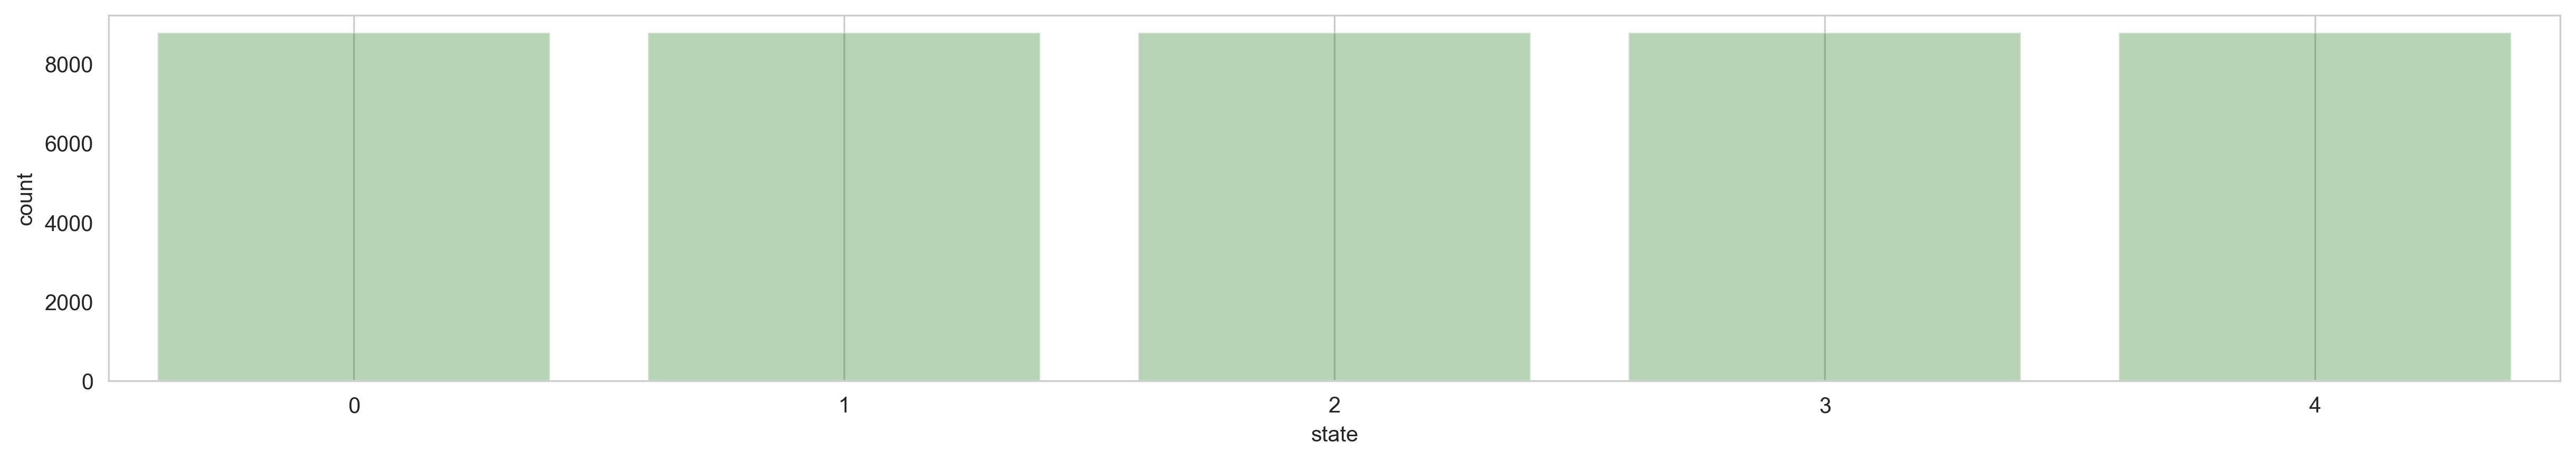

In [29]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.countplot(x=y_res,color='green',alpha=0.3)
plt.grid()

### Use KMeans to determine the optimal number of clusters

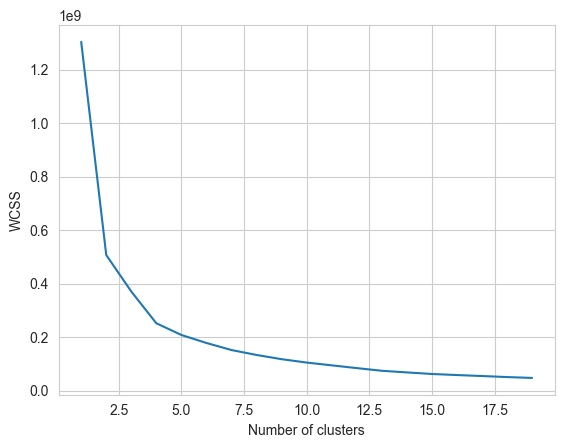

In [30]:
from sklearn.cluster import KMeans

k_values = range(1,20)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_res)
    score = kmeans.inertia_
    wcss.append(score)

plt.plot(k_values, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
# import umap
# import seaborn as sns
# import random
#
# k = 4
#
# reducer = umap.UMAP(min_dist=0.3,n_neighbors=k,verbose=2)
# reduced_data_train = reducer.fit_transform(X_train_res,y_res)
#
# labels = y_res
# labels = labels.replace({0:'cycling',1:'effector',3:'other',4:'progenitor',2:'terminal exhausted'})
#
# ax,fig = plt.subplots(figsize=(3.5,3.5),dpi=150)
# sns.scatterplot(x=reduced_data_train[:,0],y=reduced_data_train[:,1],hue=labels,palette='magma')
# plt.legend(loc='center left',bbox_to_anchor=(1,0.5),fontsize=6)
# plt.xticks(fontsize=6)
# plt.yticks(fontsize=6)
# plt.grid();

### Build a K-nearest neigbors model using euclidean distance to cluster the data

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

validate_vars = X_valid.iloc[:,5:].columns

def fit_knn_model(X_train,y,X_valid,vars):

    final_data_frame = pd.DataFrame(np.zeros([1,5]),columns=['a_i','b_i','c_i','d_i','e_i'])
    for var in vars:
        print(f'fitting, predicting, & adding the clusters of a KNeighborsClassifier with 4 neighbors for {var}...')
        knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
        knn_model = knn.fit(X_train,y)

        X_valid_df = X_valid[['gRNA_maxID','condition','lane','gRNA_bam','umi',var]]
        X_valid_df.columns = ['gRNA_maxID','condition','lane','gRNA_bam','umi','0']
        y_pred_knn_validate = knn_model.predict(X_valid_df)
        X_valid_df['cluster'] = y_pred_knn_validate

        X_valid_proportion = X_valid_df.groupby('cluster',as_index=False)['0'].sum()
        X_valid_proportion = X_valid_proportion['0']/X_valid_proportion['0'].sum()
        X_valid_proportion = pd.DataFrame(X_valid_proportion).T
        X_valid_proportion.columns = ['a_i','b_i','c_i','d_i','e_i']
        final_data_frame = pd.concat([final_data_frame,X_valid_proportion],axis=0)

    final_data_frame = final_data_frame.drop(0,axis=0)
    final_data_frame.index = vars
    final_data_frame = pd.DataFrame(round(final_data_frame,9))
    final_data_frame = final_data_frame.rename_axis('gene')
    return final_data_frame

validate_data_predicted = fit_knn_model(X_train_res,y_res,X_valid,validate_vars)
validate_data_predicted

fitting, predicting, & adding the clusters of a KNeighborsClassifier with 4 neighbors for Aqr...
fitting, predicting, & adding the clusters of a KNeighborsClassifier with 4 neighbors for Bach2...
fitting, predicting, & adding the clusters of a KNeighborsClassifier with 4 neighbors for Bhlhe40...


,a_i,b_i,c_i,d_i,e_i
gene,,,,,
Aqr,0.773970,0.051096,0.026479,0.099030,0.049425
Bach2,0.579946,0.094928,0.022016,0.241674,0.061435
Bhlhe40,0.744465,0.064444,0.022149,0.114208,0.054734


In [33]:
validate_data_predicted.to_csv('submission_challenge_1/solution/validation_output.csv',index=True)

### Get the ground truth

In [34]:
def get_ground_truth(df,vars):
    final_data_frame = pd.DataFrame(np.zeros([1,5]),columns=['a_i','b_i','c_i','d_i','e_i'])
    for var in vars:
        ground_truth = df.groupby('state',as_index=False)[var].sum()
        ground_truth = ground_truth[var]/ground_truth[var].sum()
        ground_truth = pd.DataFrame(ground_truth).T
        ground_truth.columns = ['a_i','b_i','c_i','d_i','e_i']
        final_data_frame = pd.concat([final_data_frame,ground_truth],axis=0)

    final_data_frame = final_data_frame.drop(0,axis=0)
    final_data_frame.index = vars
    final_data_frame = round(final_data_frame,9)
    return final_data_frame

ground_truth = get_ground_truth(validate_data,validate_vars)
ground_truth

,a_i,b_i,c_i,d_i,e_i
Aqr,0.483451,0.100323,0.023656,0.072681,0.319890
Bach2,0.285906,0.248267,0.021330,0.271820,0.172677
Bhlhe40,0.432710,0.149026,0.012876,0.095539,0.309850


### Compare the prediction to the ground truth

In [35]:
diff = validate_data_predicted - ground_truth
diff = diff.apply(lambda x: round(x * 100,9))
diff = diff.apply(lambda x: x.astype(str)+' %' )
diff = diff.rename_axis(['diff_in_%'])
diff

,a_i,b_i,c_i,d_i,e_i
diff_in_%,,,,,
Aqr,29.0519207 %,-4.9226739 %,0.2823122 %,2.6349023 %,-27.046464 %
Bach2,29.4039726 %,-15.3338246 %,0.068596 %,-3.0146002 %,-11.1241515 %
Bhlhe40,31.1755091 %,-8.458218 %,0.9273716 %,1.8669143 %,-25.511583 %


# Predict test data

In [46]:
print('splitting the data into train,validate, & test sets...')
X = perturbed_data_final.drop(['Ets1','Fosb','Mafk','Stat3'],axis=1)
test_data = pd.concat([perturbed_data_final.iloc[:,0:4],perturbed_data_final[['Ets1','Fosb','Mafk','Stat3']]],axis=1)
test_data['gRNA_bam'] = perturbed_data_final['gRNA_bam']
test_data['umi'] = perturbed_data_final['umi']
X

splitting the data into train,validate, & test sets...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCCGGACCTTCAGCGGAAGC,ATGACG
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGATCTCTCTGGATTTTAT,ACAGTG
053l1_AAACCTGCAGCAGTTT-1,Tox2-3,cycling,Tox2,lane1,0.000000,0.192784,0.493393,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGCATTACCTT-1,Ikzf3-3,cycling,Ikzf3,lane1,0.412417,0.703557,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CACACGTCGCAGTTCATCTT,CAATCG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.957485,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCAGTTTCCACC-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.000000,0.000000,0.534219,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCACGCATGGAGAGGGTGAG,AAGAGG
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGGGACCAGCTTAGCGTGG,CTGAGA


In [47]:
check_nans(test_data)

,index,0


In [48]:
test_data

,gRNA_maxID,state,condition,lane,Ets1,Fosb,Mafk,Stat3,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,0.484165,0.000000,0.000000,0.808991,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,0.693748,0.000000,0.000000,0.693748,TCCGGACCTTCAGCGGAAGC,ATGACG
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,1.270666,0.996512,0.000000,1.485605,CCGATCTCTCTGGATTTTAT,ACAGTG
053l1_AAACCTGCAGCAGTTT-1,Tox2-3,cycling,Tox2,lane1,0.493393,0.000000,0.192784,1.482045,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGCATTACCTT-1,Ikzf3-3,cycling,Ikzf3,lane1,1.520224,0.000000,0.000000,1.809050,CACACGTCGCAGTTCATCTT,CAATCG
...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,Tox2-3,terminal exhausted,Tox2,lane4,0.589212,0.000000,0.589212,0.957485,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCAGTTTCCACC-1,Tox2-3,terminal exhausted,Tox2,lane4,0.880552,0.000000,0.000000,1.510849,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,0.300263,0.300263,0.300263,1.011989,CCACGCATGGAGAGGGTGAG,AAGAGG
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,0.383328,0.383328,0.000000,1.204711,CCGGGACCAGCTTAGCGTGG,CTGAGA


### Encoding categorical columns

In [49]:
from sklearn.preprocessing import LabelEncoder

def encode_data(X_df,df_test):

    encoder_A = LabelEncoder()
    encoder_B = LabelEncoder()
    encoder_C = LabelEncoder()
    encoder_D = LabelEncoder()
    encoder_E = LabelEncoder()
    encoder_F = LabelEncoder()

    print('encoding train categorical variables...')
    X_df['gRNA_maxID'] = encoder_A.fit_transform(X_df['gRNA_maxID'])
    X_df['state'] = encoder_B.fit_transform(X_df['state'])
    X_df['condition'] = encoder_C.fit_transform(X_df['condition'])
    X_df['lane'] = encoder_D.fit_transform(X_df['lane'])
    X_df['gRNA_bam'] = encoder_E.fit_transform(X_df['gRNA_bam'])
    X_df['umi'] = encoder_F.fit_transform(X_df['umi'])

    print('encoding test categorical variables...')
    df_test['gRNA_maxID'] = encoder_A.transform(df_test['gRNA_maxID'])
    df_test['state'] = encoder_B.transform(df_test['state'])
    df_test['condition'] = encoder_C.transform(df_test['condition'])
    df_test['lane'] = encoder_D.transform(df_test['lane'])
    df_test['gRNA_bam'] = encoder_E.fit_transform(df_test['gRNA_bam'])
    df_test['umi'] = encoder_F.fit_transform(df_test['umi'])

    return X_df,df_test

X_data_labeled,test_data_labeled = encode_data(X,test_data)
X_data_labeled

encoding train categorical variables...
encoding test categorical variables...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.192784,0.493393,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.412417,0.703557,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.957485,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,0.534219,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


In [50]:
test_data_labeled

,gRNA_maxID,state,condition,lane,Ets1,Fosb,Mafk,Stat3,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.484165,0.000000,0.000000,0.808991,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.693748,0.000000,0.000000,0.693748,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,1.270666,0.996512,0.000000,1.485605,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.493393,0.000000,0.192784,1.482045,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,1.520224,0.000000,0.000000,1.809050,27,131
...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.589212,0.000000,0.589212,0.957485,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.880552,0.000000,0.000000,1.510849,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.300263,0.300263,0.300263,1.011989,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.383328,0.383328,0.000000,1.204711,64,232


### Normalize training data

In [51]:
def normalize_data(df_X,df_test):
    print('normalizing training data...')
    df_train_normalized = df_X.copy()
    df_train_normalized.iloc[:,4:-2] = (df_train_normalized.iloc[:,4:-2] / df_train_normalized.iloc[:,4:-2].sum(axis=0)) * 10000
    df_train_normalized.iloc[:,4:-2] = np.log1p(df_train_normalized.iloc[:,4:-2])

    print('normalizing test data...')
    df_test_normalized = df_test.copy()
    df_test_normalized.iloc[:,4:-2] = (df_test_normalized.iloc[:,4:-2] / df_test_normalized.iloc[:,4:-2].sum(axis=0)) * 10000
    df_test_normalized.iloc[:,4:-2] = np.log1p(df_test_normalized.iloc[:,4:-2])

    return  df_train_normalized,df_test_normalized

df_X_data_normalized,df_test_normalized = normalize_data(X_data_labeled,test_data_labeled)
df_X_data_normalized

normalizing training data...
normalizing test data...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.483347,0.682062,0.533027,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.328872,0.357263,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.424871,0.884221,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.606129,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,1.002922,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.519660,0.474053,0.566592,0.757739,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.400153,0.000000,0.287896,0.000000,0.805876,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


In [52]:
df_test_normalized

,gRNA_maxID,state,condition,lane,Ets1,Fosb,Mafk,Stat3,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.336644,0.000000,0.000000,0.311381,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.453299,0.000000,0.000000,0.272520,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.718040,2.229372,0.000000,0.513328,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.342077,0.000000,1.210624,0.512365,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.813908,0.000000,0.000000,0.597131,27,131
...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.396814,0.000000,2.104064,0.359326,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.546917,0.000000,0.000000,0.520127,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.221715,1.252507,1.540908,0.376363,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.275267,1.432810,0.000000,0.434377,64,232


In [53]:
nans_X = check_nans(df_X_data_normalized)
nans_X

,index,0
519,Nav1,19855
5011,Wnt5b,19855
8693,Igfbp3,19855
13441,Slc25a2,19855
14680,Cnksr1,19855
14974,Btk,19855
14976,D030040B21Rik,19855
14990,Gm14435,19855
14991,Fabp4,19855
14997,Dcdc2b,19855


In [54]:
df_X_data_normalized = df_X_data_normalized.fillna(0)
df_X_data_normalized

,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.483347,0.682062,0.533027,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.328872,0.357263,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.424871,0.884221,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.606129,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,1.002922,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.519660,0.474053,0.566592,0.757739,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.400153,0.000000,0.287896,0.000000,0.805876,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


In [55]:
check_nans(df_test_normalized)

,index,0


In [56]:
df_X_data_normalized = df_X_data_normalized.drop(nans_X['index'],axis=1)
df_X_data_normalized

,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.483347,0.682062,0.533027,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.328872,0.357263,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.424871,0.884221,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.606129,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,1.002922,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.519660,0.474053,0.566592,0.757739,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.400153,0.000000,0.287896,0.000000,0.805876,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


### Dimensionality reduction: applying PCA

In [57]:
from sklearn.decomposition import KernelPCA

print('applying PCA of 1 component to the data...')
pca = KernelPCA(n_components=1,kernel='rbf')

left_side = df_test_normalized.iloc[:,:4]
left_side['gRNA_bam'] = df_test_normalized['gRNA_bam']
left_side['umi'] = df_test_normalized['umi']
left_side = left_side.reset_index(drop=True)
right_side = df_test_normalized.iloc[:,4:-2]
right_side = right_side.reset_index(drop=True)
right_side_pca = pd.DataFrame(pca.fit_transform(right_side))
df_X_data_normalized_PCA = pd.concat([left_side,right_side_pca],axis=1)
df_X_data_normalized_PCA

applying PCA of 1 component to the data...


,gRNA_maxID,state,condition,lane,gRNA_bam,umi,0
0,169,1,61,0,138,62,-0.172579
1,171,1,62,0,151,113,-0.170511
2,162,1,59,0,58,32,0.778546
3,169,0,61,0,138,62,0.377782
4,80,0,28,0,27,131,-0.136338
...,...,...,...,...,...,...,...
19850,169,4,61,3,138,62,0.742248
19851,169,4,61,3,138,62,-0.165954
19852,25,0,8,3,48,12,0.784166
19853,146,0,52,3,64,232,0.522972


### Split the data into X,X_test,y

In [58]:
print('splitting the data into X & y...')
X_train = df_X_data_normalized_PCA.drop('state',axis=1).reset_index(drop=True)
X_train.columns = X_train.columns.astype(str)
y_train = df_X_data_normalized_PCA['state'].reset_index(drop=True)
X_test = df_test_normalized.drop('state',axis=1)

X_train

splitting the data into X & y...


,gRNA_maxID,condition,lane,gRNA_bam,umi,0
0,169,61,0,138,62,-0.172579
1,171,62,0,151,113,-0.170511
2,162,59,0,58,32,0.778546
3,169,61,0,138,62,0.377782
4,80,28,0,27,131,-0.136338
...,...,...,...,...,...,...
19850,169,61,3,138,62,0.742248
19851,169,61,3,138,62,-0.165954
19852,25,8,3,48,12,0.784166
19853,146,52,3,64,232,0.522972


In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res,y_train_res = smote.fit_resample(X_train,y_train)

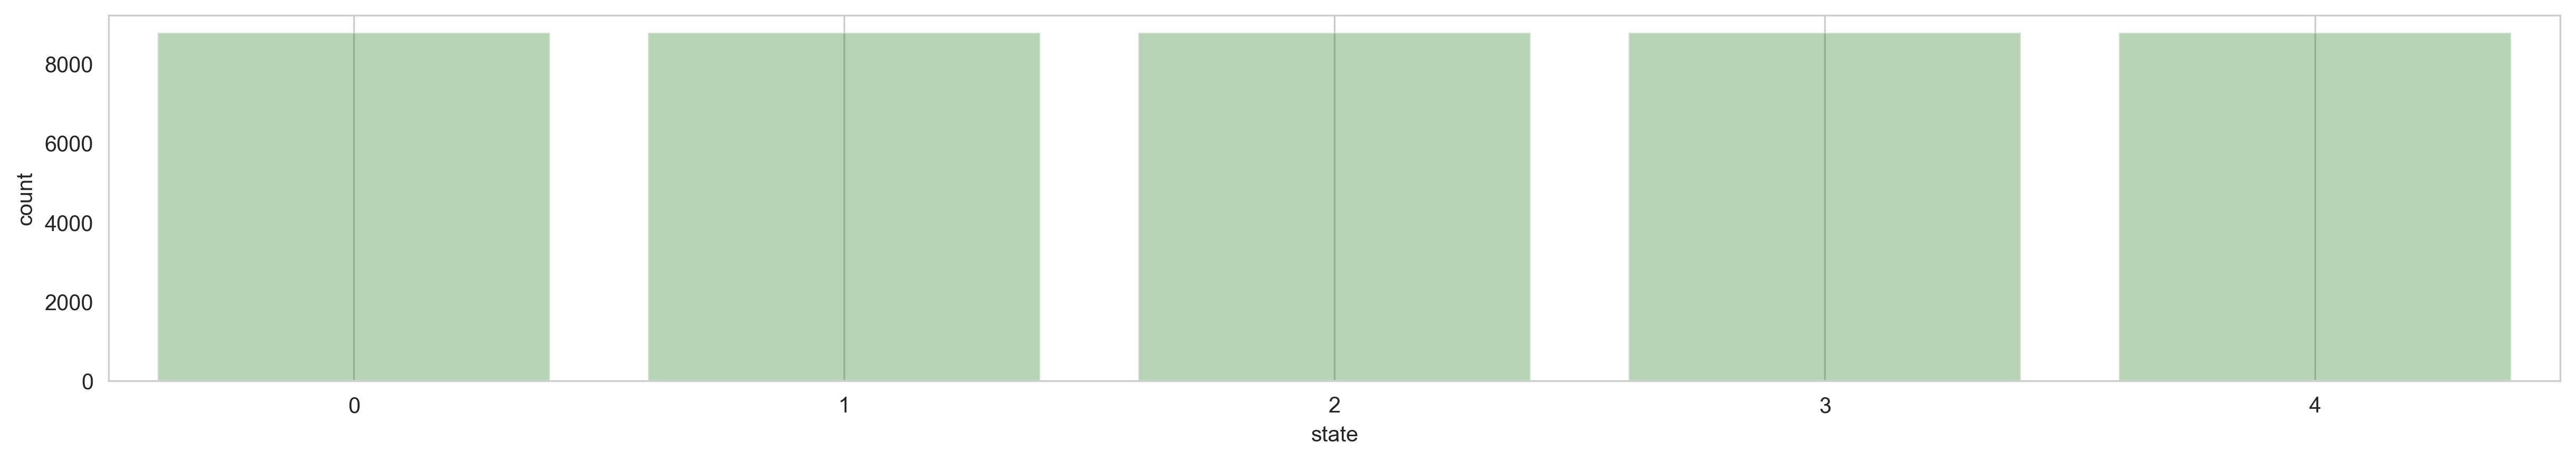

In [60]:
ax, fig = plt.subplots(figsize=(20, 3), dpi=300)
ax = sns.countplot(x=y_train_res, color='green', alpha=0.3)
plt.grid()

In [61]:
X_train_res

,gRNA_maxID,condition,lane,gRNA_bam,umi,0
0,169,61,0,138,62,-0.172579
1,171,62,0,151,113,-0.170511
2,162,59,0,58,32,0.778546
3,169,61,0,138,62,0.377782
4,80,28,0,27,131,-0.136338
...,...,...,...,...,...,...
43855,124,43,2,155,14,0.324625
43856,58,20,2,53,362,-0.172676
43857,169,61,2,138,62,-0.163953
43858,169,61,0,138,62,-0.151481


In [62]:
test_data

,gRNA_maxID,state,condition,lane,Ets1,Fosb,Mafk,Stat3,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.484165,0.000000,0.000000,0.808991,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.693748,0.000000,0.000000,0.693748,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,1.270666,0.996512,0.000000,1.485605,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.493393,0.000000,0.192784,1.482045,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,1.520224,0.000000,0.000000,1.809050,27,131
...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.589212,0.000000,0.589212,0.957485,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.880552,0.000000,0.000000,1.510849,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.300263,0.300263,0.300263,1.011989,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.383328,0.383328,0.000000,1.204711,64,232


In [63]:
test_vars = test_data.iloc[:,4:-2].columns

def fit_knn_model(X,y,X_test,vars):

    final_data_frame = pd.DataFrame(np.zeros([1,5]),columns=['a_i','b_i','c_i','d_i','e_i'])
    for var in vars:
        print(f'fitting, predicting, & adding the clusters of a KNeighborsClassifier with 4 neighbors for {var}...')
        knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
        knn_model = knn.fit(X,y)

        X_test_df = X_test[['gRNA_maxID','condition','lane','gRNA_bam','umi',var]]
        X_test_df.columns = ['gRNA_maxID','condition','lane','gRNA_bam','umi','0']
        y_pred_knn_test = knn_model.predict(X_test_df)
        X_test_df['cluster'] = y_pred_knn_test

        X_test_proportion = X_test_df.groupby('cluster',as_index=False)['0'].sum()
        X_test_proportion = X_test_proportion['0']/X_test_proportion['0'].sum()
        X_test_proportion = pd.DataFrame(X_test_proportion).T
        X_test_proportion.columns = ['a_i','b_i','c_i','d_i','e_i']
        final_data_frame = pd.concat([final_data_frame,X_test_proportion],axis=0)

    final_data_frame = final_data_frame.drop(0,axis=0)
    final_data_frame.index = vars
    final_data_frame = pd.DataFrame(round(final_data_frame,9))
    final_data_frame = final_data_frame.rename_axis('gene')
    return final_data_frame

test_data_predicted = fit_knn_model(X_train_res,y_train_res,test_data,test_vars)
test_data_predicted

fitting, predicting, & adding the clusters of a KNeighborsClassifier with 4 neighbors for Ets1...
fitting, predicting, & adding the clusters of a KNeighborsClassifier with 4 neighbors for Fosb...
fitting, predicting, & adding the clusters of a KNeighborsClassifier with 4 neighbors for Mafk...
fitting, predicting, & adding the clusters of a KNeighborsClassifier with 4 neighbors for Stat3...


,a_i,b_i,c_i,d_i,e_i
gene,,,,,
Ets1,0.250542,0.259970,0.124748,0.151702,0.213038
Fosb,0.351194,0.269592,0.085101,0.172664,0.121449
Mafk,0.438793,0.216796,0.085804,0.115907,0.142700
Stat3,0.197600,0.251946,0.160209,0.154693,0.235553


In [64]:
test_data_predicted.to_csv('submission_challenge_1/solution/test_output.csv',index=True)

In [20]:
test_data_predicted = pd.read_csv('submission_challenge_1/solution/test_output.csv')
test_data_predicted = test_data_predicted.set_index('gene')
test_data_predicted

,a_i,b_i,c_i,d_i,e_i
gene,,,,,
Ets1,0.250542,0.259970,0.124748,0.151702,0.213038
Fosb,0.351194,0.269592,0.085101,0.172664,0.121449
Mafk,0.438793,0.216796,0.085804,0.115907,0.142700
Stat3,0.197600,0.251946,0.160209,0.154693,0.235553


### get the ground truth

In [21]:
ground_truth_test = get_ground_truth(test_data,test_vars)
ground_truth_test

NameError: name 'get_ground_truth' is not defined

In [24]:
dict = {'a_i':[0.0201612903225806,0.355371900826446,0.337078651685393,0.0422535211267605],
        'b_i':[0.00887096774193548,0.0826446280991735,0.415730337078651,0.126760563380281],
        'c_i':[0.0298387096774193,0.231404958677685,0.0674157303370786,0.338028169014084],
        'd_i':[0.0467741935483871,0.322314049586776,0.168539325842696,0.464788732394366],
        'e_i':[0.894354838709677,0.00826446280991735,0.0112359550561797,0.028169014084507]}
ground_truth_test_final = pd.DataFrame(dict,index=['Ets1','Fosb','Mafk','Stat3'])

ground_truth_test_final

,a_i,b_i,c_i,d_i,e_i
Ets1,0.020161,0.008871,0.029839,0.046774,0.894355
Fosb,0.355372,0.082645,0.231405,0.322314,0.008264
Mafk,0.337079,0.415730,0.067416,0.168539,0.011236
Stat3,0.042254,0.126761,0.338028,0.464789,0.028169


### Compare the prediction to the ground truth

In [25]:
diff_test = test_data_predicted - ground_truth_test_final
diff_test = diff_test.apply(lambda x: round(x * 100,9))
diff_test = diff_test.apply(lambda x: x.astype(str)+' %' )
diff_test = diff_test.rename_axis(['diff_in_%'])
diff_test

,a_i,b_i,c_i,d_i,e_i
diff_in_%,,,,,
Ets1,23.038048568 %,25.109892226 %,9.490941632 %,10.492789745 %,-68.131673671 %
Fosb,-0.417757883 %,18.69472699 %,-14.630406968 %,-14.964983959 %,11.318427019 %
Mafk,10.171447131 %,-19.893416208 %,1.838781566 %,-5.263230484 %,13.146416594 %
Stat3,15.534630687 %,12.518496162 %,-17.781942201 %,-31.009612739 %,20.738429492 %


### Read guide abundance f ile

In [67]:
# guide_abundance = pd.read_csv('guide_abundance.csv')
# guide_abundance.columns = ['guide_ID','plasmid_pool','perturbseq']
# guide_abundance

In [68]:
df_full_data

,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGATGTCGG-1,ONE-NON-GENE-SITE-7,terminal exhausted,Unperturbed,lane1,0.511520,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAACGGATCAATAGAGCCAT,TAGTCC
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCCGGACCTTCAGCGGAAGC,ATGACG
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGATCTCTCTGGATTTTAT,ACAGTG
053l1_AAACCTGAGTGTTAGA-1,ONE-NON-GENE-SITE-6,effector,Unperturbed,lane1,0.000000,1.089103,0.686024,0.686024,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CGTAGGCGATATAATTCTAG,GGAATG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.957485,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCAGTTTCCACC-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.000000,0.000000,0.534219,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCACGCATGGAGAGGGTGAG,AAGAGG
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGGGACCAGCTTAGCGTGG,CTGAGA


### Read metadata

In [69]:
# scRNA_ATAC = sc.read_10x_h5('./scRNA_ATAC.h5')

In [70]:
# scRNA = scRNA_ATAC.copy()
# scRNA = scRNA.var.reset_index(drop=False)
# scRNA = scRNA[['index','gene_ids']]
# scRNA.columns = ['condition','gene_ids']
# scRNA = scRNA.sort_values(by=('condition')).reset_index(drop=True)
# scRNA

# Challenge 2

In [71]:
df_total_data = perturbed_data_final.copy()
df_total_data

,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCCGGACCTTCAGCGGAAGC,ATGACG
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGATCTCTCTGGATTTTAT,ACAGTG
053l1_AAACCTGCAGCAGTTT-1,Tox2-3,cycling,Tox2,lane1,0.000000,0.192784,0.493393,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGCATTACCTT-1,Ikzf3-3,cycling,Ikzf3,lane1,0.412417,0.703557,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CACACGTCGCAGTTCATCTT,CAATCG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.957485,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCAGTTTCCACC-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.000000,0.000000,0.534219,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCACGCATGGAGAGGGTGAG,AAGAGG
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGGGACCAGCTTAGCGTGG,CTGAGA


### Encoding categorical columns

In [72]:
def encode_data(df):

    encoder_A = LabelEncoder()
    encoder_B = LabelEncoder()
    encoder_C = LabelEncoder()
    encoder_D = LabelEncoder()
    encoder_E = LabelEncoder()
    encoder_F = LabelEncoder()

    print('encoding categorical variables...')
    df['gRNA_maxID'] = encoder_A.fit_transform(df['gRNA_maxID'])
    df['state'] = encoder_B.fit_transform(df['state'])
    df['condition'] = encoder_C.fit_transform(df['condition'])
    df['lane'] = encoder_D.fit_transform(df['lane'])
    df['gRNA_bam'] = encoder_E.fit_transform(df['gRNA_bam'])
    df['umi'] = encoder_F.fit_transform(df['umi'])

    return df

df_total_data_labeled = encode_data(df_total_data)
df_total_data_labeled

encoding categorical variables...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.192784,0.493393,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.412417,0.703557,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.957485,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,0.534219,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


### Normalizing data

In [73]:
def normalize_data(df):
    print('normalizing data...')
    df_train_normalized = df.copy()
    df_train_normalized.iloc[:,4:-2] = (df_train_normalized.iloc[:,4:-2] / df_train_normalized.iloc[:,4:-2].sum(axis=0)) * 10000
    df_train_normalized.iloc[:,4:-2] = np.log1p(df_train_normalized.iloc[:,4:-2])

    return df_train_normalized

df_total_data_labeled_normalized = normalize_data(df_total_data_labeled)
df_total_data_labeled_normalized

normalizing data...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.483347,0.682062,0.533027,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.328872,0.357263,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.424871,0.884221,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.606129,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,1.002922,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.519660,0.474053,0.566592,0.757739,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.400153,0.000000,0.287896,0.000000,0.805876,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


### Check null values

In [77]:
nans_total_data = check_nans(df_total_data_labeled_normalized)
nans_total_data

,index,0
519,Nav1,19855
5012,Wnt5b,19855
8696,Igfbp3,19855
13445,Slc25a2,19855
14684,Cnksr1,19855
14978,Btk,19855
14980,D030040B21Rik,19855
14994,Gm14435,19855
14995,Fabp4,19855
15001,Dcdc2b,19855


In [78]:
df_total_data_labeled_normalized = df_total_data_labeled_normalized.fillna(0)
df_total_data_labeled_normalized

,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.483347,0.682062,0.533027,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.328872,0.357263,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.424871,0.884221,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.606129,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,1.002922,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.519660,0.474053,0.566592,0.757739,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.400153,0.000000,0.287896,0.000000,0.805876,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


### Dimensionality reduction: applying PCA

In [79]:
from sklearn.decomposition import KernelPCA

print('applying PCA of 1 component to the data...')
pca = KernelPCA(n_components=1,kernel='rbf')

left_side = df_total_data_labeled_normalized.iloc[:,:4]
left_side['gRNA_bam'] = df_total_data_labeled_normalized['gRNA_bam']
left_side['umi'] = df_total_data_labeled_normalized['umi']
left_side = left_side.reset_index(drop=True)
right_side = df_total_data_labeled_normalized.iloc[:,4:-2]
right_side = right_side.reset_index(drop=True)
right_side_pca = pd.DataFrame(pca.fit_transform(right_side))
df_total_data_labeled_normalized_PCA = pd.concat([left_side,right_side_pca],axis=1)
df_total_data_labeled_normalized_PCA

applying PCA of 1 component to the data...


,gRNA_maxID,state,condition,lane,gRNA_bam,umi,0
0,169,1,61,0,138,62,-0.053214
1,171,1,62,0,151,113,-0.116348
2,162,1,59,0,58,32,-0.075108
3,169,0,61,0,138,62,0.104843
4,80,0,28,0,27,131,0.005914
...,...,...,...,...,...,...,...
19850,169,4,61,3,138,62,-0.045472
19851,169,4,61,3,138,62,-0.037918
19852,25,0,8,3,48,12,0.060371
19853,146,0,52,3,64,232,-0.005462


# Split the Data into X & y

In [80]:
print('splitting the data into X & y...')
X_final = df_total_data_labeled_normalized_PCA.drop('state',axis=1).reset_index(drop=True)
X_final.columns = X_final.columns.astype(str)
y_final = df_total_data_labeled_normalized_PCA['state'].reset_index(drop=True)

X_final

splitting the data into X & y...


,gRNA_maxID,condition,lane,gRNA_bam,umi,0
0,169,61,0,138,62,-0.053214
1,171,62,0,151,113,-0.116348
2,162,59,0,58,32,-0.075108
3,169,61,0,138,62,0.104843
4,80,28,0,27,131,0.005914
...,...,...,...,...,...,...
19850,169,61,3,138,62,-0.045472
19851,169,61,3,138,62,-0.037918
19852,25,8,3,48,12,0.060371
19853,146,52,3,64,232,-0.005462


In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_final_res,y_final_res = smote.fit_resample(X_final,y_final)

X_final_res

,gRNA_maxID,condition,lane,gRNA_bam,umi,0
0,169,61,0,138,62,-0.053214
1,171,62,0,151,113,-0.116348
2,162,59,0,58,32,-0.075108
3,169,61,0,138,62,0.104843
4,80,28,0,27,131,0.005914
...,...,...,...,...,...,...
43855,124,43,2,155,14,-0.001132
43856,58,20,2,53,362,-0.075341
43857,169,61,2,138,62,0.038340
43858,169,61,0,138,62,0.020204


In [82]:
check_nans(X_final_res)

,index,0


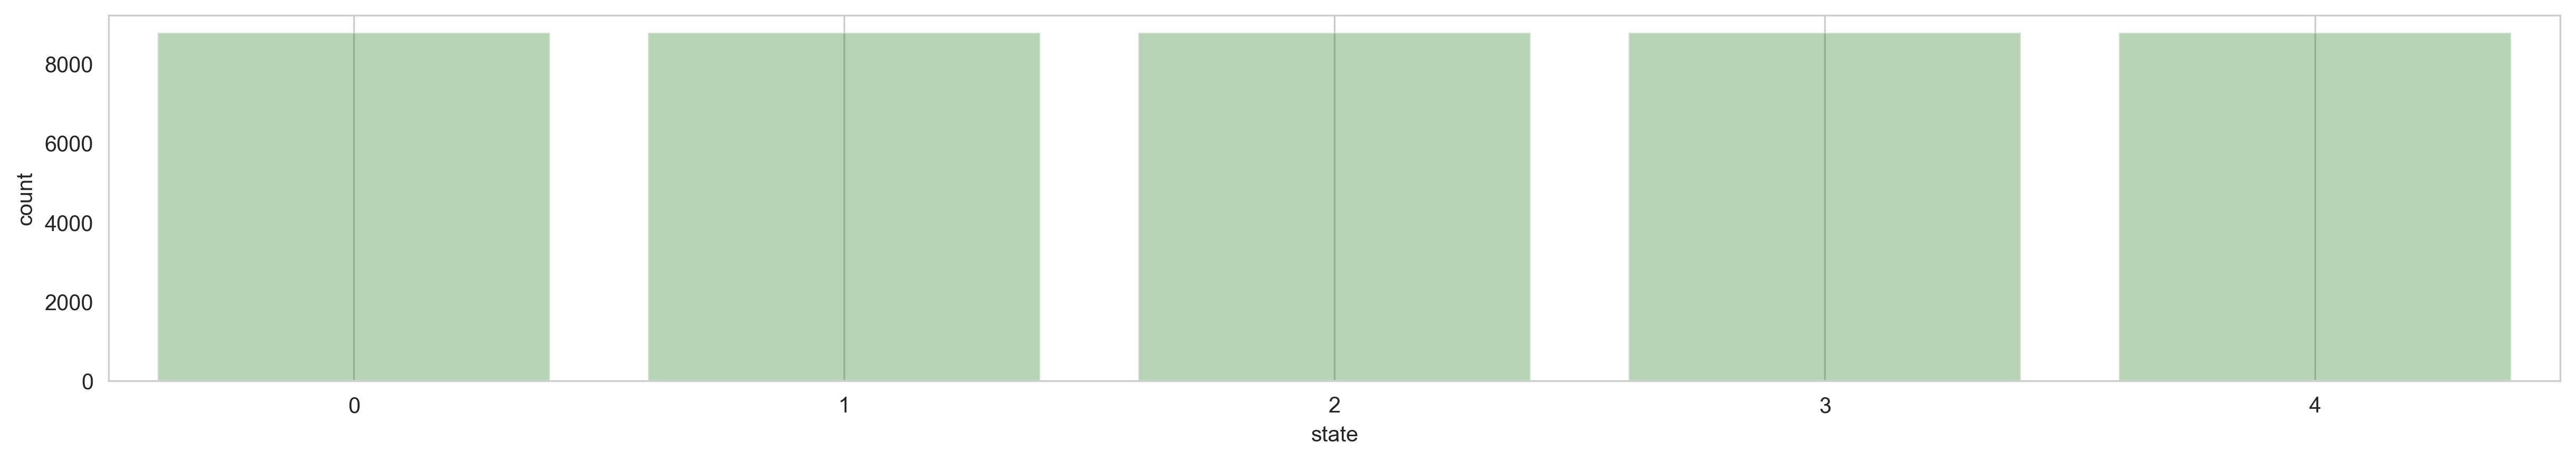

In [83]:
ax, fig = plt.subplots(figsize=(20, 3), dpi=300)
ax = sns.countplot(x=y_final_res, color='green', alpha=0.3)
plt.grid()

### Filter the genes

In [84]:
df_genes = df_total_data_labeled_normalized.iloc[:,4:-2]
df_genes

,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Gm26901,Rrs1,Adhfe1,...,Slc3a1,Cfap53,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot
053l1_AAACCTGAGCAACGGT-1,0.483347,0.682062,0.533027,0.000000,0.000000,0.000000,0.000000,0.0,0.896311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTACGACG-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.353998,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTGAAGAG-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGCAGCAGTTT-1,0.000000,0.328872,0.357263,0.000000,0.000000,0.000000,0.586863,0.0,1.153644,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGCATTACCTT-1,0.424871,0.884221,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,0.000000,0.000000,0.606129,0.000000,0.000000,0.000000,1.602422,0.0,1.017136,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCAGTTTCCACC-1,0.000000,0.000000,0.000000,0.000000,1.002922,0.000000,0.000000,0.0,0.955706,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCAGTGTTG-1,0.519660,0.474053,0.566592,0.757739,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCTTCAACT-1,0.400153,0.000000,0.287896,0.000000,0.805876,0.000000,0.000000,0.0,0.764742,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Predict the final state of all genes (around 1.5 hours)

In [85]:
def fit_knn_model(X,y,df_genes):

    final_data_frame = pd.DataFrame(np.zeros([1,5]),columns=['a_i','b_i','c_i','d_i','e_i'])
    X.columns = X.columns.astype(str)
    for gene in tqdm(df_genes.columns):
        knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
        knn_model = knn.fit(X,y)

        X_df = df_total_data_labeled_normalized[['gRNA_maxID','condition','lane','gRNA_bam','umi',gene]]
        X_df.columns = ['gRNA_maxID','condition','lane','gRNA_bam','umi','0']
        y_pred_knn_test = knn_model.predict(X_df)
        X_df['cluster'] = y_pred_knn_test

        X_proportion = X_df.groupby('cluster',as_index=False)['0'].sum()
        X_proportion = X_proportion['0']/X_proportion['0'].sum()
        X_proportion = pd.DataFrame(X_proportion).T
        X_proportion.columns = ['a_i','b_i','c_i','d_i','e_i']
        final_data_frame = pd.concat([final_data_frame,X_proportion],axis=0)

    final_data_frame = final_data_frame.drop(0,axis=0)
    final_data_frame.index = df_genes.columns
    final_data_frame = pd.DataFrame(round(final_data_frame,9))
    final_data_frame = final_data_frame.rename_axis('gene')
    return final_data_frame

final_data_predicted = fit_knn_model(X_final_res,y_final_res,df_genes)
final_data_predicted.to_csv('final_data_predicted.csv',index=True)
final_data_predicted

100%|██████████| 15077/15077 [2:01:41<00:00,  2.06it/s]    


,a_i,b_i,c_i,d_i,e_i
gene,,,,,
Mrpl15,0.775672,0.048428,0.023534,0.103474,0.048892
Lypla1,0.762115,0.056885,0.024562,0.101811,0.054627
Tcea1,0.766570,0.054038,0.023562,0.102524,0.053306
Atp6v1h,0.757641,0.065648,0.025190,0.096033,0.055488
Rb1cc1,0.731753,0.071445,0.028274,0.111369,0.057159
...,...,...,...,...,...
9130016M20Rik,0.759222,0.240778,0.000000,0.000000,0.000000
Htr7,1.000000,0.000000,0.000000,0.000000,0.000000
Col17a1,1.000000,0.000000,0.000000,0.000000,0.000000


In [86]:
final_data = pd.read_csv('final_data_predicted.csv')
final_data

,gene,a_i,b_i,c_i,d_i,e_i
0,Mrpl15,0.775672,0.048428,0.023534,0.103474,0.048892
1,Lypla1,0.762115,0.056885,0.024562,0.101811,0.054627
2,Tcea1,0.766570,0.054038,0.023562,0.102524,0.053306
3,Atp6v1h,0.757641,0.065648,0.025190,0.096033,0.055488
4,Rb1cc1,0.731753,0.071445,0.028274,0.111369,0.057159
...,...,...,...,...,...,...
15072,9130016M20Rik,0.759222,0.240778,0.000000,0.000000,0.000000
15073,Htr7,1.000000,0.000000,0.000000,0.000000,0.000000
15074,Col17a1,1.000000,0.000000,0.000000,0.000000,0.000000
15075,Awat2,1.000000,0.000000,0.000000,0.000000,0.000000


In [87]:
check_nans(final_data)

,index,0
1,a_i,18
2,b_i,18
3,c_i,18
4,d_i,18
5,e_i,18


In [88]:
final_data = final_data.fillna(0)
final_data

,gene,a_i,b_i,c_i,d_i,e_i
0,Mrpl15,0.775672,0.048428,0.023534,0.103474,0.048892
1,Lypla1,0.762115,0.056885,0.024562,0.101811,0.054627
2,Tcea1,0.766570,0.054038,0.023562,0.102524,0.053306
3,Atp6v1h,0.757641,0.065648,0.025190,0.096033,0.055488
4,Rb1cc1,0.731753,0.071445,0.028274,0.111369,0.057159
...,...,...,...,...,...,...
15072,9130016M20Rik,0.759222,0.240778,0.000000,0.000000,0.000000
15073,Htr7,1.000000,0.000000,0.000000,0.000000,0.000000
15074,Col17a1,1.000000,0.000000,0.000000,0.000000,0.000000
15075,Awat2,1.000000,0.000000,0.000000,0.000000,0.000000


# Challenge part_a

In [89]:
final_data_a_ordered = final_data.copy()

final_data_a_ordered = final_data_a_ordered.sort_values(by='a_i',ascending=False)
final_data_a_ordered['cycling_constraint'] = np.where(final_data_a_ordered['d_i'].values > 0.05,1,0)
final_data_a_ordered = final_data_a_ordered.rename(columns={'a_i':'objective'})
final_data_a_ordered.index = final_data_a_ordered['gene']
final_data_a_ordered = final_data_a_ordered[['objective','cycling_constraint']]

final_data_a_ordered

,objective,cycling_constraint
gene,,
Kcnj13,1.0,0
4930557F10Rik,1.0,0
Gm16341,1.0,0
Lhx5,1.0,0
Gm36551,1.0,0
...,...,...
Zfp111,0.0,1
Gm2629,0.0,1
Hebp1,0.0,1


### Submission part_a

In [90]:
final_data_a_ordered.to_csv('submission_challenge_2/part_a/part_a_output.csv',index=True)

# Challenge part_b

In [91]:
final_data_b_ordered = final_data.copy()

final_data_b_ordered['objective'] = (final_data_b_ordered['a_i'] / 0.0675) + (final_data_b_ordered['b_i'] / 0.2097) - (final_data_b_ordered['c_i'] / 0.3134) + (final_data_b_ordered['d_i'] / 0.3921)
final_data_b_ordered['objective'] = round(final_data_b_ordered['objective'],9)
final_data_b_ordered = final_data_b_ordered.sort_values(by='objective',ascending=False)
final_data_b_ordered['cycling_constraint'] = np.where(final_data_b_ordered['d_i'].values > 0.05,1,0)
final_data_b_ordered.index = final_data_b_ordered['gene']
final_data_b_ordered = final_data_b_ordered[['objective','cycling_constraint']]

final_data_b_ordered

,objective,cycling_constraint
gene,,
Gm32585,14.814815,0
Mmp28,14.814815,0
Trav13d-1,14.814815,0
Gm48559,14.814815,0
Tmod4,14.814815,0
...,...,...
Ppifos,-0.225529,1
Gm40841,-0.423541,1
Bhlha15,-0.459942,1


### Submission part_b

In [92]:
final_data_b_ordered.to_csv('submission_challenge_2/part_b/part_b_output.csv',index=True)

# Challenge part_c

### Submission part_c

In [93]:
final_data.to_csv('submission_challenge_2/part_c/part_c_output.csv',index=True)